In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os
import sqlite3
import json

In [2]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("/Users/joshhopkins/Desktop/Data Bootcamp/Legendary-Pokemon-Learning/Data-and-DBs/pokedex.db")
train_df = pd.read_sql_query("SELECT * from gens_1_to_6", con)

# Verify that result of SQL query is stored in the dataframe
train_df.head()

,NUMBER,CODE,SERIAL,NAME,TYPE1,TYPE2,COLOR,ABILITY1,ABILITY2,ABILITY_HIDDEN,...,HEIGHT,WEIGHT,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL,CAPTURE_RATE
0,1,1,11,Bulbasaur,Grass,Poison,Green,Overgrow,None,Chrolophyll,...,0.7,6.9,45,49,49,65,65,45,318,45
1,2,1,21,Ivysaur,Grass,Poison,Green,Overgrow,None,Chrolophyll,...,1.0,13.0,60,62,63,80,80,60,405,45
2,3,1,31,Venusaur,Grass,Poison,Green,Overgrow,None,Chrolophyll,...,2.0,100.0,80,82,83,100,100,80,525,45
3,3,2,32,Mega Venusaur,Grass,Poison,Green,Thick Fat,None,None,...,2.4,155.5,80,100,123,122,120,80,625,45
4,4,1,41,Charmander,Fire,None,Red,Blaze,None,Solar Power,...,0.6,8.5,39,52,43,60,50,65,309,45


In [10]:
from sklearn.preprocessing import LabelEncoder
#encoding the training data
#F, A. (2017, March 11). convert text columns into numbers in sklearn [web log]. https://stackoverflow.com/questions/34915813/convert-text-columns-into-numbers-in-sklearn. 
le = LabelEncoder()
encoded_training = train_df[train_df.columns[:]].apply(le.fit_transform)

In [11]:
y = encoded_training["LEGENDARY_FLAG"]
target_names = ["Non-Legendary", "Legendary"]

In [12]:
X = encoded_training.drop(["NUMBER", "CODE", "SERIAL", "NAME", "COLOR", "GENERATION", "HEIGHT", "WEIGHT", "LEGENDARY_FLAG"], axis=1)
X.head()

,TYPE1,TYPE2,ABILITY1,ABILITY2,ABILITY_HIDDEN,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL,CAPTURE_RATE
0,9,14,82,53,11,17,24,23,41,37,24,57,5
1,9,14,82,53,11,31,37,37,55,50,38,94,5
2,9,14,82,53,11,51,57,55,71,66,58,164,5
3,9,14,138,53,70,51,73,86,86,77,58,187,5
4,6,12,9,53,107,11,27,18,36,22,43,51,5


In [14]:
#call all entries from the gen7 and gen_8 table in the db
test_1_df = pd.read_sql('SELECT * FROM gen_7', con)
test_2_df = pd.read_sql('SELECT * FROM gen_8', con)

In [25]:
#encoding the test 1 & 2 data 
#F, A. (2017, March 11). convert text columns into numbers in sklearn [web log]. https://stackoverflow.com/questions/34915813/convert-text-columns-into-numbers-in-sklearn.
encoded_test_1 = test_1_df[test_1_df.columns[:]].apply(le.fit_transform)
encoded_test_2 = test_2_df[test_2_df.columns[:]].apply(le.fit_transform)

In [26]:
#pull necessary info from the gen_7 and gen_8 testing dfs to create test data
y_test_1 = encoded_test_1["LEGENDARY_FLAG"]
target_names = ["Non-Legendary", "Legendary"]

y_test_2 = encoded_test_2["LEGENDARY_FLAG"]
target_names = ["Non-Legendary", "Legendary"]

In [27]:
X_test_1 = encoded_test_1.drop(["NUMBER", "CODE", "SERIAL", "NAME", "COLOR", "GENERATION", "HEIGHT", "WEIGHT", "LEGENDARY_FLAG"], axis=1)
X_test_2 = encoded_test_2.drop(["NUMBER", "CODE", "SERIAL", "NAME", "COLOR", "GENERATION", "HEIGHT", "WEIGHT", "LEGENDARY_FLAG"], axis=1)

In [28]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X)

In [29]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X)
X_test_1_scaled = X_scaler.transform(X_test_1)
X_test_2_scaled = X_scaler.transform(X_test_2)

k: 1, Train/Test 1 Score: 1.000/0.737
k: 1, Train/Test 2 Score: 1.000/0.838
k: 3, Train/Test 1 Score: 0.967/0.737
k: 3, Train/Test 2 Score: 0.967/0.838
k: 5, Train/Test 1 Score: 0.965/0.737
k: 5, Train/Test 2 Score: 0.965/0.838
k: 7, Train/Test 1 Score: 0.965/0.737
k: 7, Train/Test 2 Score: 0.965/0.838
k: 9, Train/Test 1 Score: 0.963/0.737
k: 9, Train/Test 2 Score: 0.963/0.838
k: 11, Train/Test 1 Score: 0.965/0.737
k: 11, Train/Test 2 Score: 0.965/0.838
k: 13, Train/Test 1 Score: 0.963/0.737
k: 13, Train/Test 2 Score: 0.963/0.838
k: 15, Train/Test 1 Score: 0.963/0.737
k: 15, Train/Test 2 Score: 0.963/0.838
k: 17, Train/Test 1 Score: 0.957/0.737
k: 17, Train/Test 2 Score: 0.957/0.838
k: 19, Train/Test 1 Score: 0.958/0.737
k: 19, Train/Test 2 Score: 0.958/0.838


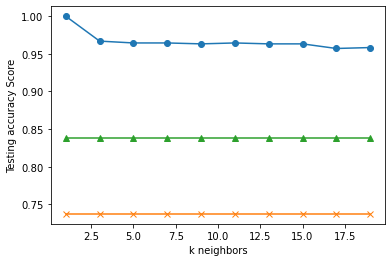

In [32]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_1_scores = []
test_2_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y)
    train_score = knn.score(X_train_scaled, y)
    test_1_score = knn.score(X_test_1_scaled, y_test_1)
    test_2_score = knn.score(X_test_2_scaled, y_test_2)
    train_scores.append(train_score)
    test_1_scores.append(test_1_score)
    test_2_scores.append(test_2_score)
    print(f"k: {k}, Train/Test 1 Score: {train_score:.3f}/{test_1_score:.3f}")
    print(f"k: {k}, Train/Test 2 Score: {train_score:.3f}/{test_2_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_1_scores, marker="x")
plt.plot(range(1, 20, 2), test_2_scores, marker="^")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [34]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y)
print('k=11 Test Acc: %.3f' % knn.score(X_test_1_scaled, y_test_1))
print('k=11 Test Acc: %.3f' % knn.score(X_test_2_scaled, y_test_2))

k=11 Test Acc: 0.737
k=11 Test Acc: 0.838


In [ ]:
con.close()